In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [2]:
df_test = pd.read_csv('data/10kGNAD-master/test.csv', header=None, sep=';', quotechar="'", names=['label', 'text'])

In [3]:
filename='data/train.csv'
df_train = pd.read_csv(filename, header=None, sep=';', quotechar="'", names=['label', 'text'])

# build the classifier pipeline
lsvc_classifier = Pipeline([
('vect', CountVectorizer()),
('tfidf', TfidfTransformer(
    sublinear_tf=True # Apply sublinear tf scaling, i.e. replace tf with 1 + log(tf).
)),
('clf', LinearSVC(
    dual=False,
    C=1.6,
    class_weight="balanced"
))
])

lsvc_classifier.fit(df_train['text'], df_train['label'])  # train the classifier
predicted = lsvc_classifier.predict(df_test['text'])  # predict the test set 
acc = np.mean(predicted == df_test['label'])  # calculate the accuracy
  
print(filename[16:-4],"%.2f" % float((100 - acc*100)), sep=" -> ") # print the error rate

ter/train -> 11.48


In [12]:
#Confusion Matrix
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
predicted_class = lsvc_classifier.predict(df_test.text)  # predict all test cases

In [14]:
#encode actual class for confusion matrix
label = LabelEncoder()
label.fit(df_train.label)
int_data_act = label.transform(df_test.label)
int_data_act = int_data_act.reshape(len(int_data_act), 1)

#encode predicted class for confusion matrix
int_data_pred = label.transform(predicted_class)
int_data_pred = int_data_pred.reshape(len(int_data_pred), 1)

In [15]:
#create confusion matrix
data = {'y_Actual': np.ravel(int_data_act).tolist(),
        'y_Predicted': np.ravel(int_data_pred).tolist()}

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)

In [16]:
confusion_matrix  # pandas confusion matrix

Predicted,0,1,2,3,4,5,6,7,8,All
Actual,,,,,,,,,,
0,55,1,3,0,1,0,5,2,0,67
1,0,90,1,3,2,0,0,4,2,102
2,2,1,129,0,12,1,0,5,1,151
3,0,1,0,49,4,0,0,0,0,54
4,0,6,7,3,140,0,2,7,3,168
5,0,0,0,0,2,117,1,0,0,120
6,1,0,2,1,4,0,153,6,1,168
7,0,5,4,0,3,0,7,122,0,141
8,0,0,1,0,0,0,0,1,55,57


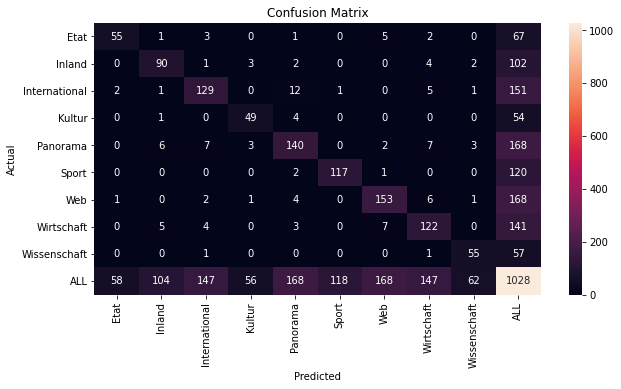

In [19]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix, annot=True, xticklabels=(sorted(set(df_test.label)) + ['ALL']), yticklabels=(sorted(set(df_test.label)) + ['ALL']),fmt='g')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#TP 910
#TPR 0.885